In [33]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

from einops import rearrange, reduce, repeat, pack, unpack

In [2]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

In [3]:
train_dataloader = DataLoader(training_data, batch_size=16, shuffle=True)

images, labels = next(iter(train_dataloader))

## Stacking
### With View

In [15]:
stacked_image = images.view(images.shape[0] * images.shape[2], images.shape[3])

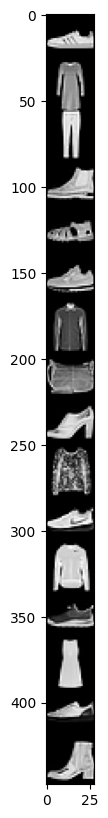

In [16]:
figure = plt.figure(figsize=(10, 10))
plt.imshow(stacked_image.squeeze(), cmap="gray")

### With Einops Rearrange

In [5]:
stacked_image = rearrange(images, 'b c h w -> c (b h) w')

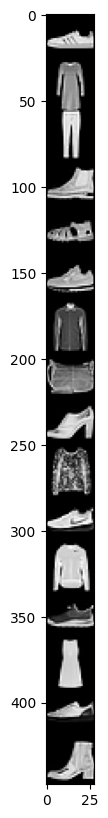

In [10]:
figure = plt.figure(figsize=(10, 10))
plt.imshow(stacked_image.squeeze(), cmap="gray")

## Joining Bounding Boxes and Predictions
### With Concat

In [18]:
bounding_boxes = torch.ones(10, 4)
bounding_boxes.shape

torch.Size([10, 4])

In [19]:
predictions = torch.zeros(10)

In [21]:
torch.concat([bounding_boxes, predictions.unsqueeze(dim=1)], dim=1)

tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.]])

### With Pack

In [30]:
bbox_and_pred, ps = pack([bounding_boxes, predictions], 'h *')
bbox_and_pred

tensor([[1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0.]])

In [31]:
ps

[torch.Size([4]), torch.Size([])]

### An Example of Using Unpack

In [34]:
unpack(bbox_and_pred, ps, 'h *')

[tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])]